In [1]:
import yt
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
base_dir = os.environ['HOME'] + '/software/ROMSX/Exec/Upwelling/'
clean_dir = os.environ['HOME'] + '/software/ROMSX/Exec/Upwelling/'

base = yt.load(clean_dir + 'plt00100')
tiles = yt.load(base_dir + 'plt_t200100')

files = [base, tiles]

yt : [INFO     ] 2023-08-15 12:57:40,288 Parameters: current_time              = 3000.0
yt : [INFO     ] 2023-08-15 12:57:40,289 Parameters: domain_dimensions         = [41 80 16]
yt : [INFO     ] 2023-08-15 12:57:40,290 Parameters: domain_left_edge          = [   0.    0. -150.]
yt : [INFO     ] 2023-08-15 12:57:40,292 Parameters: domain_right_edge         = [41000. 80000.     0.]


In [5]:
ads = []
for f in files:
    adf = f.covering_grid(level=0,left_edge=f.domain_left_edge, dims=f.domain_dimensions)
    ads.append(adf)


In [7]:
fields = ['salt', 'temp', 'x_velocity', 'y_velocity']
for field in fields:
    fn1 = ads[0][field].to_ndarray()
    fn2 = ads[1][field].to_ndarray()
    print(np.max(np.abs(fn1-fn2)))

salt
0.0 dimensionless


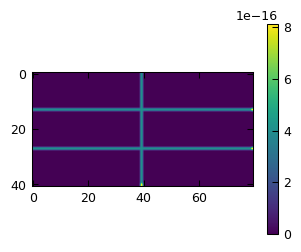

temp
0.0 dimensionless


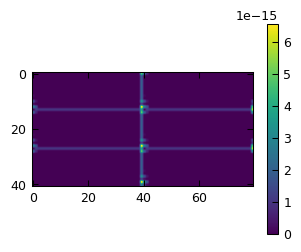

x_velocity
0.0 cm/s


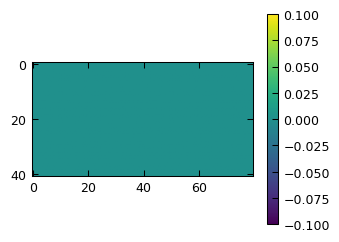

y_velocity
0.0 cm/s


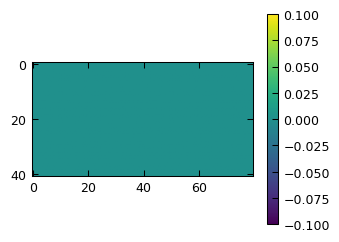

In [72]:
for field in fields:
    print(field)
    plt.imshow((np.abs(ads[0][field]-ads[1][field])/ads[0][field])[:,:,15])
    plt.colorbar()
    print(np.abs(ads[0][field]-ads[1][field])[21,0,12])
    plt.show()